# lgb010: feature importance

In [52]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

In [5]:
glob.glob("./models/lgb010_*")

['./models\\lgb010_0.pkl',
 './models\\lgb010_1.pkl',
 './models\\lgb010_10.pkl',
 './models\\lgb010_2.pkl',
 './models\\lgb010_3.pkl',
 './models\\lgb010_4.pkl',
 './models\\lgb010_5.pkl',
 './models\\lgb010_6.pkl',
 './models\\lgb010_7.pkl',
 './models\\lgb010_8.pkl',
 './models\\lgb010_9.pkl']

In [39]:
def get_feature_importance(model):
    return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))

In [40]:
features = pd.read_csv("./models/lgb010.csv")
model = load_model("./models/lgb010_0.pkl")

features["fi"] = get_feature_importance(model)

[info] load lgbmodel : ./models/lgb010_0.pkl


In [41]:
features.sort_values("fi").head(120)

,feature_name,fi
345,installments_7_new_trans,0.000000
441,state_id_8_new_trans,0.000000
440,state_id_7_new_trans,0.000000
439,state_id_6_new_trans,0.000000
435,state_id_2_new_trans,0.000000
421,purchase_month_201705_new_trans,0.000000
419,purchase_month_201703_new_trans,0.000000
416,purchase_hour_21_new_trans,0.000000
198,state_id_6_hist_trans,0.000000
412,purchase_hour_17_new_trans,0.000000


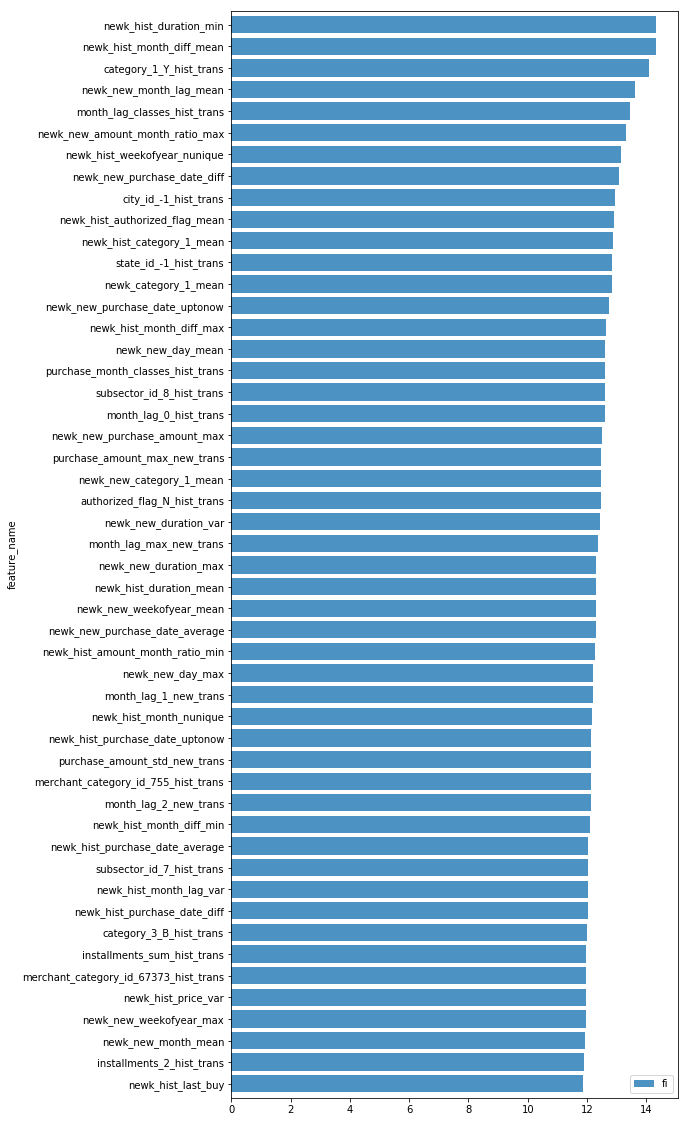

In [42]:
(features.set_index("feature_name")
         .sort_values("fi")
         .tail(50)
         .plot(kind="barh", figsize=(8, 20), alpha=.8, width=.8))

In [54]:
feature_importance_df = pd.DataFrame()
for i in range(11):
    part = pd.read_csv("./models/lgb010.csv")
    model = load_model("./models/lgb010_{}.pkl".format(i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load lgbmodel : ./models/lgb010_0.pkl
[info] load lgbmodel : ./models/lgb010_1.pkl
[info] load lgbmodel : ./models/lgb010_2.pkl
[info] load lgbmodel : ./models/lgb010_3.pkl
[info] load lgbmodel : ./models/lgb010_4.pkl
[info] load lgbmodel : ./models/lgb010_5.pkl
[info] load lgbmodel : ./models/lgb010_6.pkl
[info] load lgbmodel : ./models/lgb010_7.pkl
[info] load lgbmodel : ./models/lgb010_8.pkl
[info] load lgbmodel : ./models/lgb010_9.pkl
[info] load lgbmodel : ./models/lgb010_10.pkl


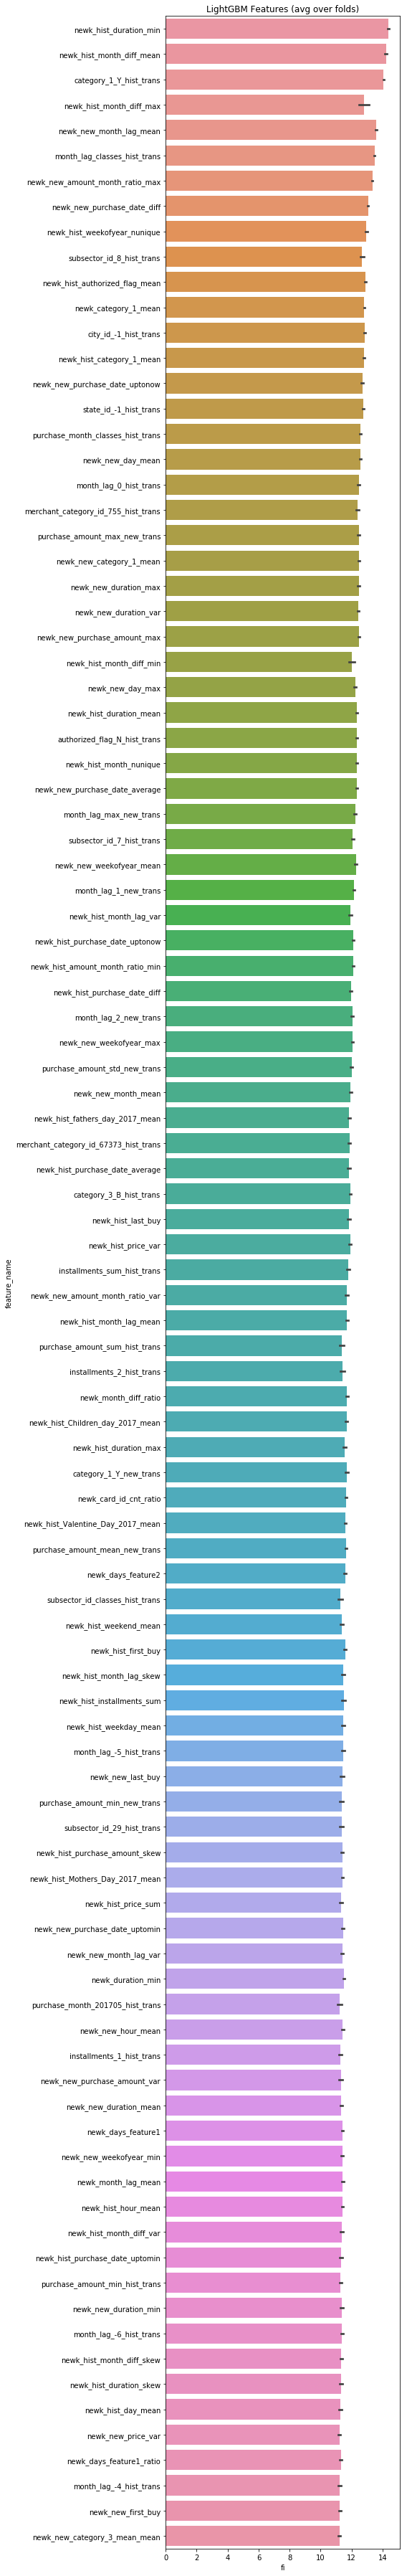

In [56]:
topk = feature_importance_df.groupby("feature_name").mean().sort_values(by="fi", ascending=False)[:100].index

toshow = feature_importance_df[feature_importance_df.feature_name.isin(topk)]

plt.figure(figsize=(8, 50))
sns.barplot(x="fi", y="feature_name", data=toshow.sort_values(by="fi", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [57]:
avg_importance = feature_importance_df.groupby("feature_name").mean().sort_values(by="fi", ascending=False)

In [60]:
avg_importance.describe()

,fi
count,692.000000
mean,7.872355
std,3.756682
min,0.000000
25%,5.705350
50%,9.113919
75%,10.738184
max,14.361510


In [61]:
list(avg_importance.tail(100).index)

['city_id_213_new_trans',
 'subsector_id_25_new_trans',
 'state_id_11_new_trans',
 'purchase_month_201706_new_trans',
 'city_id_322_new_trans',
 'merchant_category_id_683_new_trans',
 'city_id_161_new_trans',
 'subsector_id_31_new_trans',
 'subsector_id_3_new_trans',
 'subsector_id_14_new_trans',
 'city_id_286_new_trans',
 'merchant_category_id_511_new_trans',
 'merchant_category_id_108_new_trans',
 'merchant_category_id_360_new_trans',
 'city_id_88_new_trans',
 'subsector_id_16_new_trans',
 'city_id_333_new_trans',
 'purchase_hour_22_new_trans',
 'city_id_233_new_trans',
 'merchant_category_id_437_new_trans',
 'city_id_25_hist_trans',
 'subsector_id_36_new_trans',
 'merchant_category_id_560_new_trans',
 'subsector_id_15_new_trans',
 'city_id_57_new_trans',
 'city_id_200_hist_trans',
 'city_id_231_new_trans',
 'state_id_1_new_trans',
 'state_id_7_new_trans',
 'merchant_category_id_607_new_trans',
 'city_id_20_new_trans',
 'state_id_22_new_trans',
 'subsector_id_2_new_trans',
 'city_id_

In [62]:
low_importance = [
    'city_id_213_new_trans',
    'subsector_id_25_new_trans',
    'state_id_11_new_trans',
    'purchase_month_201706_new_trans',
    'city_id_322_new_trans',
    'merchant_category_id_683_new_trans',
    'city_id_161_new_trans',
    'subsector_id_31_new_trans',
    'subsector_id_3_new_trans',
    'subsector_id_14_new_trans',
    'city_id_286_new_trans',
    'merchant_category_id_511_new_trans',
    'merchant_category_id_108_new_trans',
    'merchant_category_id_360_new_trans',
    'city_id_88_new_trans',
    'subsector_id_16_new_trans',
    'city_id_333_new_trans',
    'purchase_hour_22_new_trans',
    'city_id_233_new_trans',
    'merchant_category_id_437_new_trans',
    'city_id_25_hist_trans',
    'subsector_id_36_new_trans',
    'merchant_category_id_560_new_trans',
    'subsector_id_15_new_trans',
    'city_id_57_new_trans',
    'city_id_200_hist_trans',
    'city_id_231_new_trans',
    'state_id_1_new_trans',
    'state_id_7_new_trans',
    'merchant_category_id_607_new_trans',
    'city_id_20_new_trans',
    'state_id_22_new_trans',
    'subsector_id_2_new_trans',
    'city_id_291_new_trans',
    'merchant_category_id_834_new_trans',
    'subsector_id_10_new_trans',
    'subsector_id_13_hist_trans',
    'city_id_76_new_trans',
    'installments_4_new_trans',
    'merchant_category_id_87_new_trans',
    'merchant_category_id_557_new_trans',
    'merchant_category_id_111_new_trans',
    'subsector_id_12_new_trans',
    'state_id_10_new_trans',
    'state_id_13_new_trans',
    'city_id_143_new_trans',
    'subsector_id_38_new_trans',
    'city_id_244_new_trans',
    'purchase_hour_7_new_trans',
    'installments_999_hist_trans',
    'state_id_6_hist_trans',
    'installments_12_new_trans',
    'subsector_id_-1_new_trans',
    'subsector_id_9_new_trans',
    'installments_11_new_trans',
    'state_id_14_new_trans',
    'installments_7_new_trans',
    'state_id_17_new_trans',
    'city_id_4_new_trans',
    'city_id_51_new_trans',
    'state_id_8_new_trans',
    'installments_9_new_trans',
    'subsector_id_40_new_trans',
    'merchant_category_id_518_new_trans',
    'subsector_id_41_new_trans',
    'city_id_289_new_trans',
    'state_id_6_new_trans',
    'subsector_id_4_new_trans',
    'installments_999_new_trans',
    'authorized_flag_classes_new_trans',
    'subsector_id_5_new_trans',
    'city_id_160_new_trans',
    'city_id_283_new_trans',
    'subsector_id_11_hist_trans',
    'subsector_id_28_hist_trans',
    'purchase_month_201705_new_trans',
    'purchase_month_201704_new_trans',
    'purchase_month_201703_new_trans',
    'subsector_id_17_new_trans',
    'subsector_id_23_new_trans',
    'purchase_hour_6_new_trans',
    'subsector_id_24_new_trans',
    'merchant_category_id_273_new_trans',
    'city_id_140_new_trans',
    'subsector_id_26_new_trans',
    'city_id_117_new_trans',
    'subsector_id_28_new_trans',
    'subsector_id_11_new_trans',
    'city_id_246_hist_trans',
    'city_id_246_new_trans',
    'city_id_248_new_trans',
    'subsector_id_14_hist_trans',
    'subsector_id_13_new_trans',
    'city_id_25_new_trans',
    'merchant_category_id_813_new_trans',
    'merchant_category_id_19_new_trans',
    'merchant_category_id_195_new_trans',
    'merchant_category_id_130_new_trans',
    'merchant_category_id_606_new_trans',
    'state_id_23_new_trans'
]

duplicate = [
    'newk_feature_3',
    'newk_hist_month_lag_min',
    'newk_hist_month_lag_max',
    'newk_hist_merchant_id_nunique',
    'newk_hist_merchant_category_id_nunique',
    'purchase_month_classes_hist_trans',
    'newk_hist_subsector_id_nunique',
    'newk_hist_hour_nunique',
    'installments_0_hist_trans',
    'installments_1_hist_trans',
    'state_id_22_hist_trans',
    'subsector_id_15_hist_trans',
    'subsector_id_39_hist_trans',
    'subsector_id_30_hist_trans',
    'subsector_id_33_hist_trans',
    'newk_new_installments_max',
    'newk_new_month_lag_min',
    'newk_new_month_lag_max',
    'authorized_flag_Y_new_trans',
    'newk_new_merchant_id_nunique',
    'newk_new_card_id_count',
    'newk_new_merchant_category_id_nunique',
    'purchase_month_classes_new_trans',
    'newk_new_subsector_id_nunique',
    'newk_new_hour_nunique',
    'installments_0_new_trans',
    'installments_1_new_trans',
    'state_id_22_new_trans',
    'subsector_id_15_new_trans',
    'subsector_id_39_new_trans',
    'subsector_id_30_new_trans',
    'newk_feature_mean',
    'newk_hist_weekofyear_mean',
    'newk_purchase_amount_total',
    'newk_hist_month_diff_mean',
    'newk_month_diff_mean',
    'newk_card_id_total',
    'newk_card_id_cnt_total',
    'newk_month_diff_mean'
]

In [68]:
len(set(low_importance + duplicate))

136

In [63]:
feature_list = pd.read_csv("./models/lgb010.csv")
feature_list = feature_list[~feature_list.feature_name.isin(low_importance + duplicate)]

In [64]:
feature_list.shape

(556, 1)

In [66]:
feature_list.to_csv("./models/lgb011.csv", index=False)